In [50]:
import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt
 
import warnings
warnings.filterwarnings("ignore") 
# sns.set_style("darkgrid", {"grid.color": ".6", 
#                            "grid.linestyle": ":"})
 
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 
from sklearn.linear_model import Lasso
 
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import GridSearchCV

In [51]:
df = pd.read_csv('/Users/thutranghoa/Code/Data_analysis/Data/weatherAUS.csv.download/weatherAUS.csv')
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,2011-10-23,Penrith,15.1,30.7,0.0,NaN,NaN,NNE,20.0,N,...,31.0,NaN,NaN,NaN,NaN,20.6,30.1,No,0.0,No
24554,2011-10-24,Penrith,14.9,34.5,0.0,NaN,NaN,NW,39.0,WNW,...,25.0,NaN,NaN,NaN,NaN,21.1,33.8,No,0.4,No
24555,2011-10-25,Penrith,18.9,19.9,0.4,NaN,NaN,S,43.0,SE,...,98.0,NaN,NaN,NaN,NaN,19.0,16.1,No,8.2,Yes
24556,2011-10-26,Penrith,12.3,15.9,8.2,NaN,NaN,SE,31.0,SW,...,74.0,NaN,NaN,NaN,NaN,13.8,15.4,Yes,1.6,Yes


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24558 entries, 0 to 24557
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24558 non-null  object 
 1   Location       24558 non-null  object 
 2   MinTemp        24227 non-null  float64
 3   MaxTemp        24382 non-null  float64
 4   Rainfall       24280 non-null  float64
 5   Evaporation    9432 non-null   float64
 6   Sunshine       6664 non-null   float64
 7   WindGustDir    21100 non-null  object 
 8   WindGustSpeed  21102 non-null  float64
 9   WindDir9am     21561 non-null  object 
 10  WindDir3pm     22829 non-null  object 
 11  WindSpeed9am   23985 non-null  float64
 12  WindSpeed3pm   23327 non-null  float64
 13  Humidity9am    24171 non-null  float64
 14  Humidity3pm    23498 non-null  float64
 15  Pressure9am    20172 non-null  float64
 16  Pressure3pm    20173 non-null  float64
 17  Cloud9am       14136 non-null  float64
 18  Cloud3

Text(0.5, 1.0, 'Histograms of Columns')

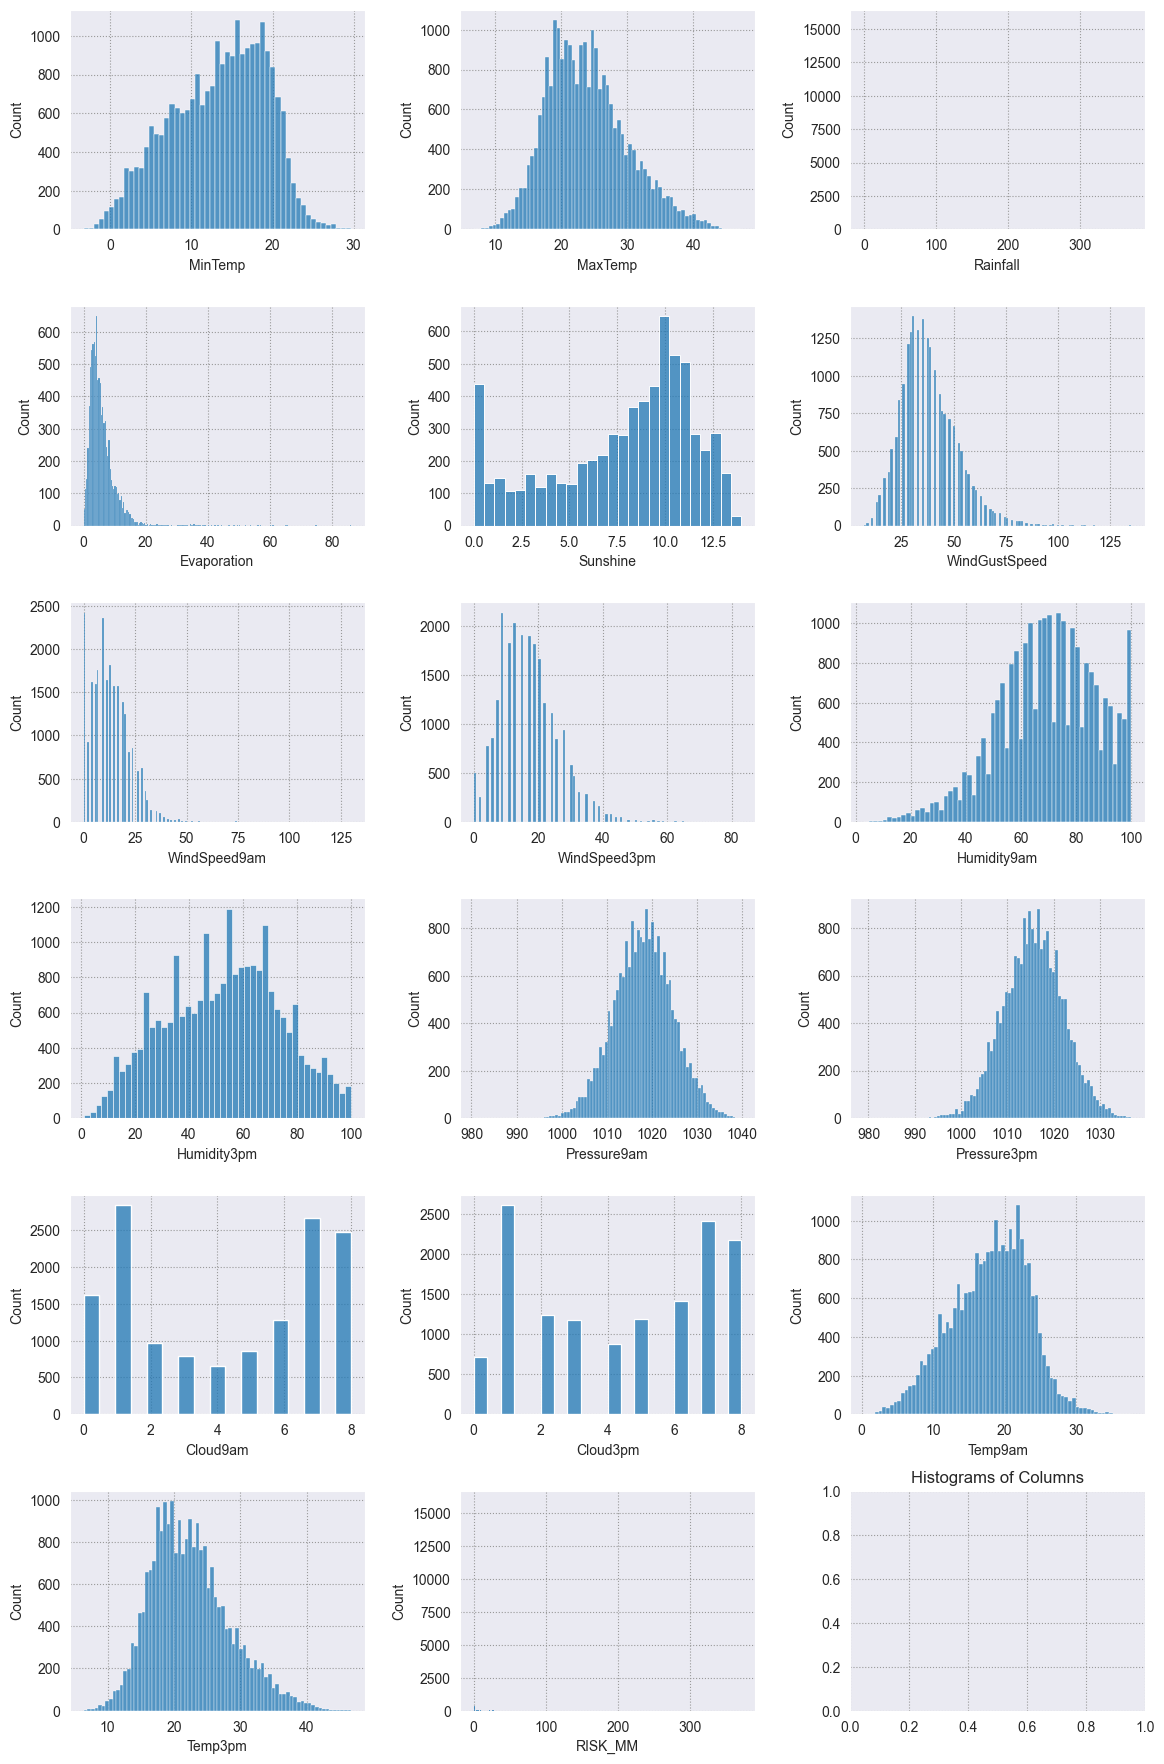

In [53]:
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(12, 18))
axes = axes.reshape(-1)

continuous = [col for col in df.columns if df[col].dtype != object]
for i, col in enumerate(continuous):
    sns.histplot(df[col], ax=axes[i])

fig.tight_layout(pad=2.0)
plt.title('Histograms of Columns')

Comment : 
- Except 'Date' and 'Location', other columns are missing values

In [54]:
'Label encoder transform String column to Int type'

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

continuous = [col for col in df.columns if df[col].dtype == object]
continuous.remove('Date')

for i in continuous : 
    df['{}'.format(i)] = le.fit_transform(df['{}'.format(i)])

df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,NaN,NaN,13,44.0,13,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0,0.0,0
1,2008-12-02,0,7.4,25.1,0.0,NaN,NaN,14,44.0,6,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0,0.0,0
2,2008-12-03,0,12.9,25.7,0.0,NaN,NaN,15,46.0,13,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0,0.0,0
3,2008-12-04,0,9.2,28.0,0.0,NaN,NaN,4,24.0,9,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0,1.0,0
4,2008-12-05,0,17.5,32.3,1.0,NaN,NaN,13,41.0,1,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,2011-10-23,8,15.1,30.7,0.0,NaN,NaN,5,20.0,3,...,31.0,NaN,NaN,NaN,NaN,20.6,30.1,0,0.0,0
24554,2011-10-24,8,14.9,34.5,0.0,NaN,NaN,7,39.0,14,...,25.0,NaN,NaN,NaN,NaN,21.1,33.8,0,0.4,0
24555,2011-10-25,8,18.9,19.9,0.4,NaN,NaN,8,43.0,9,...,98.0,NaN,NaN,NaN,NaN,19.0,16.1,0,8.2,1
24556,2011-10-26,8,12.3,15.9,8.2,NaN,NaN,9,31.0,12,...,74.0,NaN,NaN,NaN,NaN,13.8,15.4,1,1.6,1


* Comment :  We can not draw histogram of 'Rainfall' and "RISK_MM" as the ourlier is large

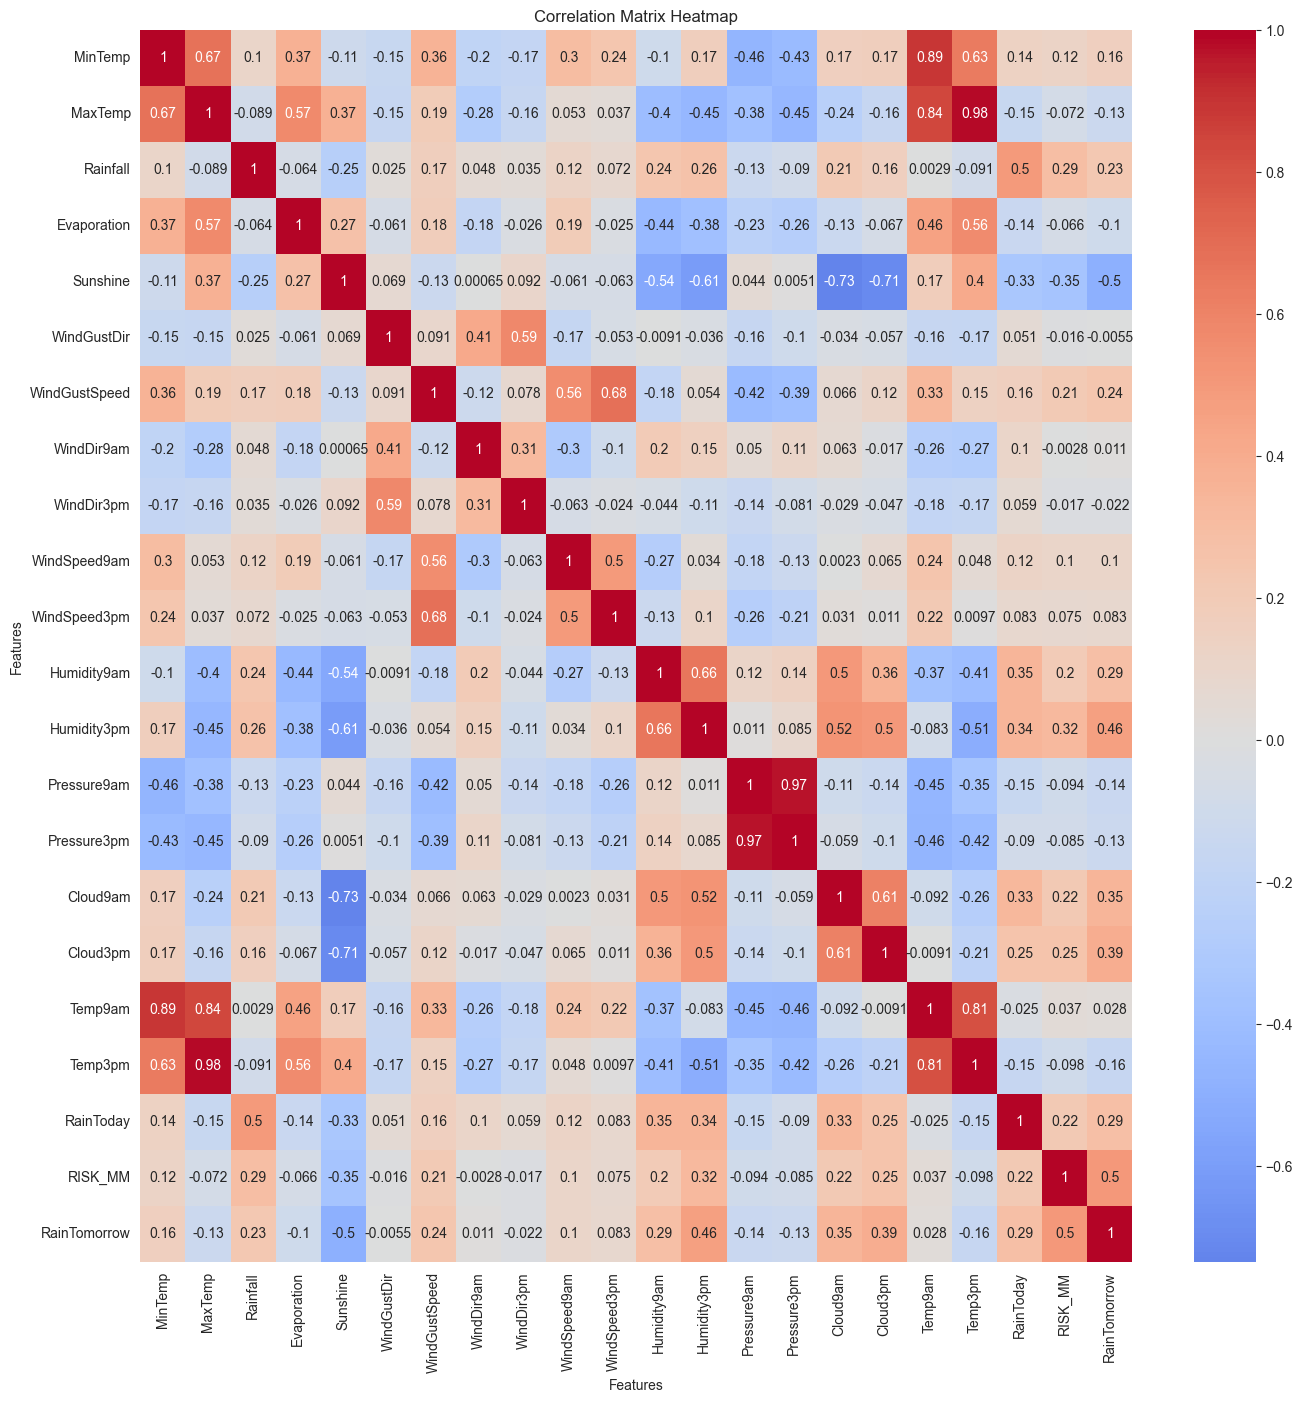

In [55]:
'Correlation matrix'
plt.figure(figsize=(16, 16))
df_ = df.drop (['Location', 'Date'], axis=1)
correlation  = df_.corr()
 
# Create heatmap
sns.heatmap(correlation, cmap='coolwarm',
            center=0, annot=True)
 
# Set title and axis labels
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
# plt.yticks(rotation = 30)
 
# Show plot
plt.show()

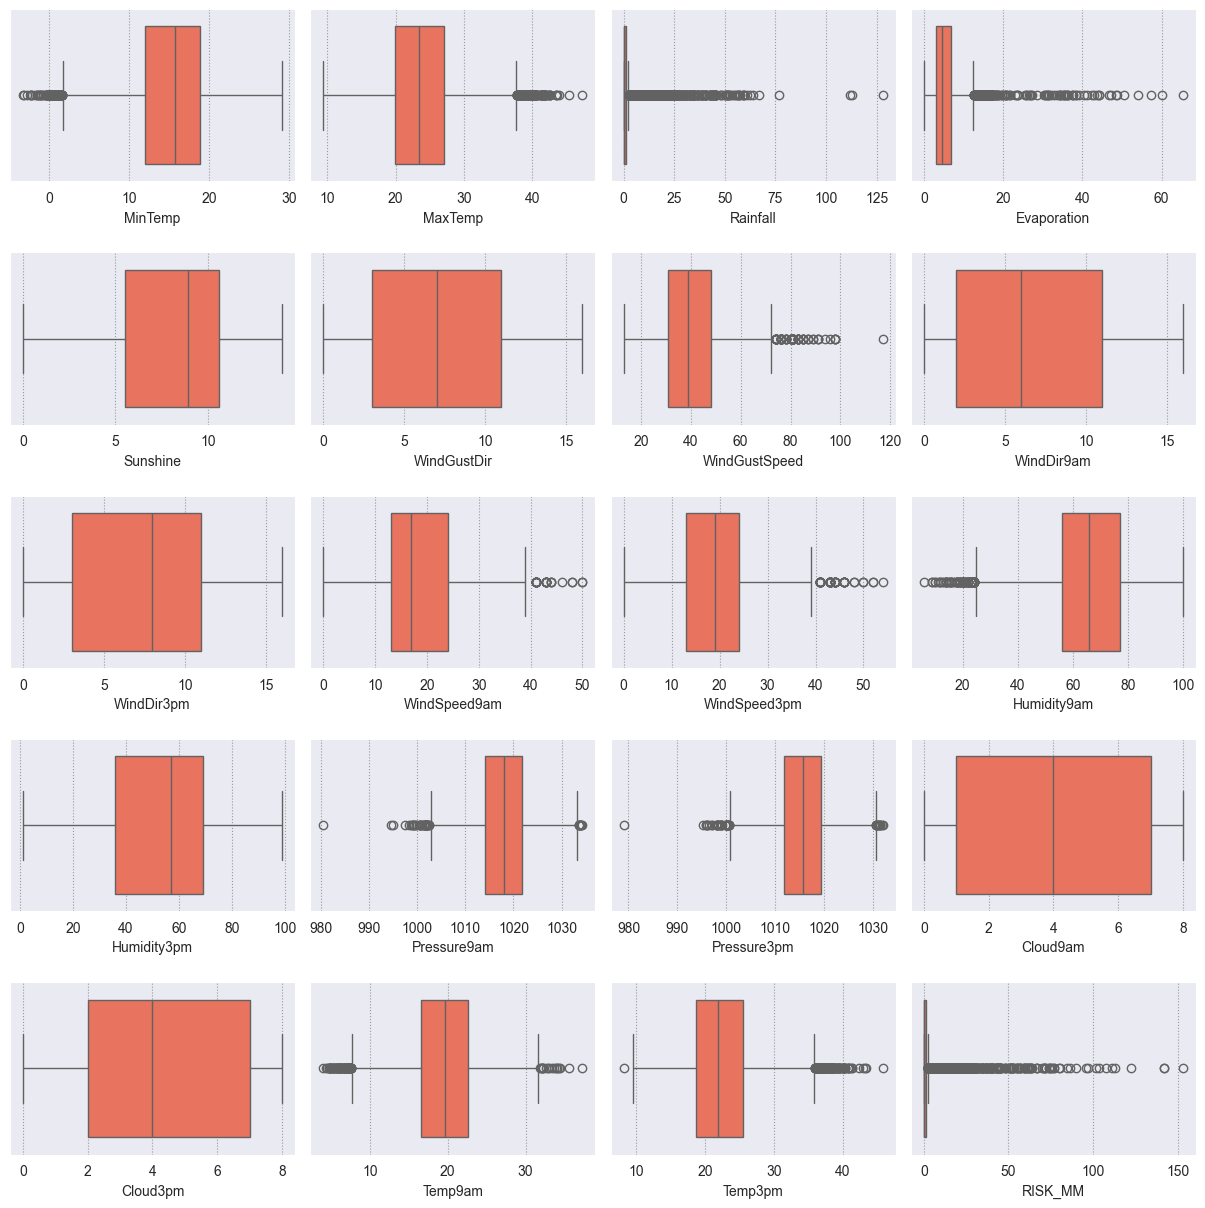

In [67]:
fig = plt.figure(figsize=(12, 12))
temp = df.drop(['Location', 'Date', 'RainTomorrow', 'RainToday'], axis=1).columns.tolist()
for i, item in enumerate(temp):
    plt.subplot(5, 4, i+1)
    sns.boxplot(data=df, x=item, color='tomato')
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=2.0)
plt.show()

In [56]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6408 entries, 5939 to 23199
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           6408 non-null   object 
 1   Location       6408 non-null   int64  
 2   MinTemp        6408 non-null   float64
 3   MaxTemp        6408 non-null   float64
 4   Rainfall       6408 non-null   float64
 5   Evaporation    6408 non-null   float64
 6   Sunshine       6408 non-null   float64
 7   WindGustDir    6408 non-null   int64  
 8   WindGustSpeed  6408 non-null   float64
 9   WindDir9am     6408 non-null   int64  
 10  WindDir3pm     6408 non-null   int64  
 11  WindSpeed9am   6408 non-null   float64
 12  WindSpeed3pm   6408 non-null   float64
 13  Humidity9am    6408 non-null   float64
 14  Humidity3pm    6408 non-null   float64
 15  Pressure9am    6408 non-null   float64
 16  Pressure3pm    6408 non-null   float64
 17  Cloud9am       6408 non-null   float64
 18  Cloud3pm 

In [57]:
X = df.drop(['Date', 'RainTomorrow'], axis = 1)
y = df['RainTomorrow']

print (X.shape)
print (y.shape)

(6408, 22)
(6408,)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=44)

In [59]:
scaler = StandardScaler()
 
# Fit the StandardScaler on the training dataset
scaler.fit(X_train)
 
# Transform the training dataset
# using the StandardScaler
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

XGBoost

In [60]:

# Create an instance of the XGBRegressor model
model_xgb = XGBClassifier()
 
# Fit the model to the training data
model_xgb.fit(x_train_scaled, y_train)

 
# Print the R-squared score on the training data
print("Xgboost Accuracy =", r2_score(
    y_train, model_xgb.predict(x_train_scaled)))

# Print the R-squared score on the test data
predictions = model_xgb.predict(x_test_scaled)
print("Xgboost Accuracy on test data =",
      r2_score(y_test, predictions))

Xgboost Accuracy = 1.0
Xgboost Accuracy on test data = 1.0


In [72]:
print ('------ XGboost for un-standard data-----')
print("Xgboost Accuracy =", r2_score(
    y_train, model_xgb.predict(X_train)))

# Print the R-squared score on the test data
pred = model_xgb.predict(X_test)
print("Xgboost Accuracy on test data =",
      r2_score(y_test, pred))

------ XGboost for un-standard data-----
Xgboost Accuracy = -3.2073170731707314
Xgboost Accuracy on test data = -3.2733333333333334


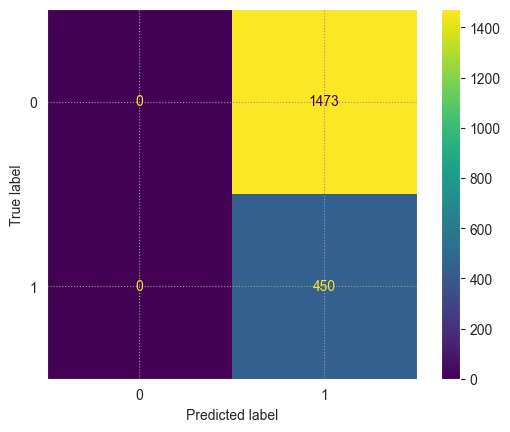

In [68]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix, classification_report

disp = ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()

In [70]:
print (classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1473
           1       0.23      1.00      0.38       450

    accuracy                           0.23      1923
   macro avg       0.12      0.50      0.19      1923
weighted avg       0.05      0.23      0.09      1923

